In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
prediction_list = []
with open("model_storage/dial-stan_2/prediction.json", mode="r+", encoding="utf-8") as fp:
    prediction_list = json.loads(fp.read())
print(prediction_list[:10])

[{'source': '도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.', 'truth': '도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.', 'pred': '도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.'}, {'source': '그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서', 'truth': '그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서', 'pred': '그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서'}, {'source': '아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.', 'truth': '아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.', 'pred': '아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.'}, {'source': '새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~', 'truth': '새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~', 'pred': '새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~'}, {'source': '그~ [고유명사]를 입양하게 됐는데 입양할 때부터도', 'truth': '그~ [고유명사]를 입양하게 됐는데 입양할 때부터도', 'pred': '그~ [고유명사]를 입양하게 됐는데 입양할 때부터도'}, {'source': '그니까는 잡종을 [고유명사]르크종인가 막 그렇게 한대 그다음에', 'truth': '그니까는 잡종을 [고유명사]르크종인가 막 그렇게 한대 그다음에', 'pred': '그니까는/을 [고유명사]르크종인가 막 그렇게 한대 그다음에'}, {'source': '뭐이 사기꾼이더만', 'truth': '뭐이 사기꾼이드만', 'pred': '뭐이 사기꾼이더만'

## BLEU 점수 히스토그램

In [10]:
from metric import compute_bleu_score

bleu_scores = []
for row in prediction_list:
    bleu_scores.append(compute_bleu_score([row["pred"]], [row["truth"]]))

bleu_scores = np.array(bleu_scores)
print(bleu_scores)

[1.         1.         1.         ... 0.88077139 1.         1.        ]


In [11]:
print(bleu_scores.shape)

(137480,)


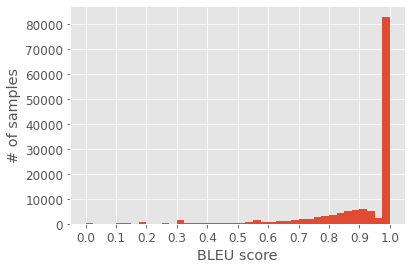

In [27]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()
ax.hist(bleu_scores, bins=40)
ax.set_xlabel('BLEU score')
ax.set_ylabel('# of samples')
ax.set_xticks([n / 10.0 for n in range(11)])

plt.show()

대부분이 1.0에 가까운 수치이지만, 그보다 작은 수치를 가지는 샘플이 적지 않다.

## 방언 샘플 히스토그램

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(prediction_list)
df

,source,truth,pred
0,도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.,도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.,도시보다는 시골이다 보니까 그렇게 이제 도시권 수도권만큼은 아니지만 뭐~ 어렵죠.
1,그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서,그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서,그렇게 하다가 이제 한 방에 인생이 골로 갈 수도 있지 않을까라는 생각이 있어서
2,아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.,아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.,아침 일곱 시부터 열두 시까지 하는 거 한 네다섯 시간 하구 삼만 원이래요.
3,새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~,새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~,새로운 제이의 삶을 살고 있는 저에게 주는 어~ 열심히 하라는 어~
4,그~ [고유명사]를 입양하게 됐는데 입양할 때부터도,그~ [고유명사]를 입양하게 됐는데 입양할 때부터도,그~ [고유명사]를 입양하게 됐는데 입양할 때부터도
...,...,...,...
137475,그~ 바람에 그~ 하나하나 막 날린 그 모습이,그~ 바람에 그~ 하나하나 막 날린 그 모습이,그~ 바람에 그~ 하나하나 막 날린 그 모습이
137476,겁 많은 물 의외로?,겁 많은 물 의외로?,겁 많은 물 의외로?
137477,그러니까 오면은 연속 초 그쪽,그러니까 오면은 연속 초 그쪽,그니까 오면은 연속 초 그쪽
137478,정말 예쁘게 잘 할텐데,정말 예쁘게 잘 할텐데,정말 예쁘게 잘 할텐데


In [5]:
dialect_df = df.loc[df["truth"] != df["source"]]
dialect_df

,source,truth,pred
6,뭐이 사기꾼이더만,뭐이 사기꾼이드만,뭐이 사기꾼이더만
16,근데 막 아~ 그걸 보니까 엄마 생각이 너무 나는 거야 막 와 엄마 운 것도 생각나...,근데 막 아~ 그걸 보니까 엄마 생각이 너무 나는겨 막 와 엄마 운 것도 생각나고 ...,근데 막 아~ 그걸 보니까 엄마 생각이 너무 나는 거 막 와 엄마 운 것도 생각나고...
21,그 동생 [고유명사]에서 했었어 그래서 그렇게 한 건데,그 동생 [고유명사]에서 했었어 글애서 그렇게 한 건데,그 동생 [고유명사]에서 했었어 그래서고 그렇게 한 건데
22,그러니까 여자 잘 만나면,긍께 여자 잘 만나믄,그니까 여자 잘 만나면
27,<UNK>용 그~ 개 있잖아 그~ 이름은 기억이 안 나는데 애완용 등으로 나눌 수 있는데,<UNK>용 그~ 개 있자녀 그~ 이름은 기억이 안 나는디 애완용 등으로 나눌 수 있는디,##고용 그~ 개 있잖아 그~ 이름은 기억이 안 나는데 애완용 등으로 나눌 수 있는데
...,...,...,...
137465,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...
137466,부동산이라도 사고 싶고 그러면 조금 목돈이 좀 큰 돈이 좀 필요하잖아 이~ 근데 나는,부동산이라도 사고 싶고 그러면 쫌 목돈이 좀 큰 돈이 좀 필요하잖아 이~ 근디 나는,부동산이라도 사고 싶고 그러면 쫌 목돈이 좀 큰 돈이 좀 필요하잖아 이~ 근데 나는
137468,특히 많잖아 근데 [고유명사] 가가지고 이제 좀 리조트 같은데서 묵었어.,특히 많잖아 근데 [고유명사] 가가지고 이제 쫌 리조트 같은데서 묵었어.,특히 많잖아 근데 [고유명사] 가가지고 이제 좀 리조트 같은데서 묵었어.
137469,근데 너희는 그 고양이를 키워서 고양이는 이게 통제가 안 되잖아.,근데 느그는 그 고양이를 키워서 고양이는 이게 통제가 안 되잖아.,근데 느그는 그 고양이를 키워서 고양이는 이게 통제가 안 되잖아.


In [8]:
from metric import compute_bleu_score

bleu = compute_bleu_score(dialect_df["pred"].to_list(), dialect_df["truth"].to_list())
print(bleu)

0.8640340544740653


In [24]:
dialect_bleu = bleu_scores[dialect_df.index]
dialect_bleu

array([0.75062385, 0.92471726, 0.81799669, ..., 0.93365107, 1.        ,
       0.91645316])

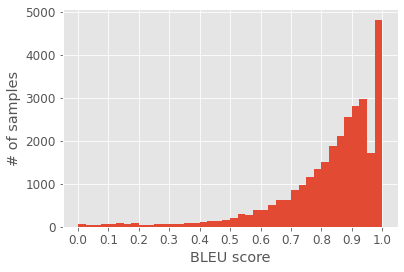

In [28]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()
ax.hist(dialect_bleu, bins=40)
ax.set_xlabel('BLEU score')
ax.set_ylabel('# of samples')
ax.set_xticks([n / 10.0 for n in range(11)])

plt.show()

양상이 크게 다르지 않았다.

방언을 잘못 예측한 부분이 많기는 하나, 그것이 bleu 점수에 큰 영향을 주지 않는다고 판단했다.

In [32]:
high_bleu = np.where(bleu_scores > 0.95)

high_bleu_df = df.loc[high_bleu]
high_bleu_df[high_bleu_df["truth"] != high_bleu_df["source"]]

,source,truth,pred
62,이거 뭐라 하는지 모르겠네.,이거 뭐라 하는지 모르겄네.,이거 뭐라 하는지 모르겄네.
64,이제 할머니 할아버지가 교회를 다니시는 것도 아니고 사실은 뭐 특별히 그래서 이제 ...,이제 할머니 할아버지가 교회를 다니시는 것도 아니고 사실은 뭐 특별히 그래서 인제 ...,이제 할머니 할아버지가 교회를 다니시는 것도 아니고 사실은 뭐 특별히 그래서 이제 ...
101,어~ 조금 많이 느꼈고 음~,어~ 쫌 많이 느꼈고 음~,어~ 쫌 많이 느꼈고 음~
118,그~ 저는 원래 [고유명사]에 살았었는데,그~ 저는 원래 [고유명사]에 살았었는디,그~ 저는 원래 [고유명사]에 살았었는데
130,그서 쪼끔 술을 많이 먹는 날이면 뭐~ 청국장이나 된장찌개도 많이 먹게 되는데,그서 쪼끔 술을 많이 먹는 날이면 뭐~ 청국장이나 된장찌개도 많이 먹게 되는디,그서 쪼끔 술을 많이 먹는 날이면 뭐~ 청국장이나 된장찌개도 많이 먹게 되는데
...,...,...,...
137381,그랬어요 그러니까 부담을 안 갖는다 아니 그러니까 부담을 안 주겠고,그랬어요 그니까 부담을 안 갖는다 아니 그니까 부담을 안 주겠고,그랬어요 그니까 부담을 안 갖는다 아니 그니까 부담을 안 주겠고
137399,조금 찾게 되는 거 같아요.,쫌 찾게 되는 거 같아요.,쫌 찾게 되는 거 같아요.
137453,조금 건강식도 있을 거고,쫌 건강식도 있을 거고,쫌 건강식도 있을 거고
137465,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...,[고유명사]랑 [고유명사] [고유명사] [고유명사] 연인으로 나오는 장면은 쪼금 더...


In [34]:
low_bleu = np.where(bleu_scores < 0.5)

low_bleu_df = df.loc[low_bleu]
low_bleu_df[low_bleu_df["truth"] != low_bleu_df["source"]]

,source,truth,pred
63,그거 있잖아.,그거 있자녀.,그거 있잖아.
291,대마도도 거이 그 정도긴 한데,대마도도 거이 그 정도긴 한디,그도 다니 그 정도긴 한데디
471,막 뭐 하면은,막 머 하믄은,막 뭐 하면은
630,포이에시스에서 기원한다고 했대.,포이에시스에서 기원한다고 했댜.,그에서 필요한다고 했대.
703,그 이쁜 얼굴에,그 이뿐 얼굴에,그 이쁜 얼굴에에
...,...,...,...
136488,이천십오 년 신설된 한미 <UNK> <UNK>의 일부로 편입 되었는데 사단장은 제,이천십오 년 신설된 한미 <UNK> <UNK>의 일부로 편입 되었는디 사단장은 제,이천십오 년 세탁기된디 맛있진의 일부로 편입 되었는데 [고유명사]은 제
136524,뭣이 좋니?,무시 좋디?,뭣이니?
136865,<UNK>이 <UNK>이 차례로 개창되어 우리나라의 불 저기 선 <UNK>가 일어나...,<UNK>이 <UNK>이 차례로 개창되어 우리나라의 불 저기 선 <UNK>가 일어나...,엄마이었이 차례로 아깝되어 우리나라의 불 저기 선만가 일어나게 되었다니까
137273,내가 까마귀다 <UNK>하고 <UNK> 수 있게 날아 보는 거야.,내가 까마귀다 <UNK>하고 <UNK> 수 있게 날아 보는겨.,내가 그러다겄하고만 수 있게 날아 보는.


bleu 점수가 낮은 경우는 문장이 짧은 경우와 UNK 토큰이 많아 제대로 예측되지 않은 경우가 보인다.

'조금'을 '쫌'으로 '모르겠네'를 '모르겄네'로 변환하는 일부 성공적인 사례가 있었으나 흔하게 등장하는 '~ㄴ데'를 '~ㄴ디'로 변환하기에 실패하는 경우가 눈에 띈다.

In [46]:
pd.set_option('display.max_colwidth', None)

In [52]:
high_dialect = high_bleu_df[high_bleu_df["truth"] != high_bleu_df["source"]]

look_idx = 220
high_dialect.iloc[look_idx:look_idx + 10, :]

,source,truth,pred
4782,난 그게 정말 맞는 말인 거 같아.,난 그게 정말 맞는 말인 거 같여.,난 그게 정말 맞는 말인 거 같여.
4784,그런 거 조금 충분히 어~ 이해할만하다 이제 그런 생각이 좀 들어요.,그런 거 쫌 충분히 어~ 이해할만하다 이제 그런 생각이 좀 들어요.,그런 거 쫌 충분히 어~ 이해할만하다 이제 그런 생각이 좀 들어요.
4793,아빠 아빠 남자 주인공이랑 그 기억을 잃은 그 아빠랑 또 어떻게 이제 이야기가 전개될지 궁금해요 왜냐면,아빠 아빠 남자 주인공이랑 그 기억을 잃은 그 아빠랑 또 어떻게 인제 이야기가 전개될지 궁금해요 왜냐면,아빠 아빠 남자 주인공이랑 그 기억을 잃은 그 아빠랑 또 어떻게 이제 이야기가 전개될지 궁금해요 왜냐면
4848,선물을 한 번에 몰아서 받게 되면 이제 선물의 [고유명사]수가 이렇게 줄어들게 되는 거야.,선물을 한 번에 몰아서 받게 되면 이제 선물의 [고유명사]수가 이렇게 줄어들게 되는겨.,선물을 한 번에 몰아서 받게 되면 이제 선물의 [고유명사]수가 이렇게 줄어들게 되는.
4862,왜냐면 자식 교육이 조금 중요하다 보니까?,왜냐면 자식 교육이 쫌 중요하다 보니까?,왜냐면 자식 교육이 쫌 중요하다 보니까?
4882,이제 뭐~ 가구 같은 거는 뭐~ 가격이 제일 중요하고 그러니까 뭐~ 슬리퍼 이런 거는 뭐 내가,이제 뭐~ 가구 같은 거는 뭐~ 가격이 제일 중요하고 그니까 뭐~ 슬리퍼 이런 거는 뭐 내가,이제 뭐~ 가구 같은 거는 뭐~ 가격이 제일 중요하고 그니까 뭐~ 슬리퍼 이런 거는 뭐 내가
4889,근데 나는 되게 못하겠어가지고 조금 이게 괜히 괜히 좀 부끄럽기도 하네.,근데 나는 되게 못하겠어가지고 쫌 이게 괜히 괜히 좀 부끄럽기도 하네.,근데 나는 되게 못하겠어가지고 쫌 이게 괜히 괜히 좀 부끄럽기도 하네.
4891,그리고 워낙 또 요즈음 뭐 잘 돼 있어 가지고 부작용도 없고,그리고 워낙 또 요즘 뭐 잘 돼 있어 가지고 부작용도 없고,그리고 워낙 또 요즘 뭐 잘 돼 있어 가지고 부작용도 없고
4912,인제 그건 기다릴 사람은 기다리고 우리는 싸게 살 수 있는데 굳이 비싸게 살 필요가 없다 이 말이지.,인제 그건 기다릴 사람은 기다리고 우리는 싸게 살 수 있는디 굳이 비싸게 살 필요가 없다 이 말이지.,인제 그건 기다릴 사람은 기다리고 우리는 싸게 살 수 있는데 굳이 비싸게 살 필요가 없다 이 말이지.
4997,그런 것들 조금 아쉽더라고 네 그런 부분들이 조금 방송에서도 조금,그런 것들 쫌 아쉽더라고 네 그런 부분들이 쫌 방송에서도 쫌,그런 것들 쫌 아쉽더라고 네 그런 부분들이 쫌 방송에서도 쫌


In [53]:
notable_index_c = [493, 665, 697, 706, 792, 842, 2307, 2354, 2350, 3467, 3405, 3400, 4782]
notable_index_w = [613, 634, 964, 1001, 1106, 2250, 2320, 2361, 3409, 3360, 4420, 4848]

high_dialect.loc[notable_index_c]

,source,truth,pred
493,막상 동물 병원을 가려해도 어려움을 많았다니까.,막상 동물 병원을 가려해도 어려움을 많았당께.,막상 동물 병원을 가려해도 어려움을 많았당께.
665,방법과 그 내가 좀 더 애들한테 효과적으로 어떻게 하면은 잘 알려줄 수 있는지 그러니까 내 눈높이로,방법과 그 내가 쫌 더 애들한테 효과적으로 어떻게 하면은 잘 알려줄 수 있는지 그니까 내 눈높이로,방법과 그 내가 좀 더 애들한테 효과적으로 어떻게 하면은 잘 알려줄 수 있는지 그니까 내 눈높이로
697,대기업 주식보다 중소기업 주식에 상승 장기 상승률이 더 높은 것이야.,대기업 주식보다 중소기업 주식에 상승 장기 상승률이 더 높은 것이여.,대기업 주식보다 중소기업 주식에 상승 장기 상승률이 더 높은 것이여.
706,걱정은 않고 후회는 약간 조금 하는 식이지 뭐~ 나의 꿈은,걱정은 않고 후회는 약간 쫌 하는 식이지 뭐~ 나의 꿈은,걱정은 않고 후회는 약간 쫌 하는 식이지 뭐~ 나의 꿈은
792,이 같은 결정은 수의사들과 반려동물의 보호자 양쪽으로 부터 많은 지지를 받고 있다니까.,이 같은 결정은 수의사들과 반려동물의 보호자 양쪽으로 부터 많은 지지를 받고 있당께.,이 같은 결정은 수의사들과 반려동물의 보호자 양쪽으로 부터 많은 지지를 받고 있당께.
842,우리 집 아가씨도 얼른 믿음 안에서 하나님의 말씀대로 살아야 되고,우리 집 아가씨도 언능 믿음 안에서 하나님의 말씀대로 살아야 되고,우리 집 아가씨도 언능 믿음 안에서 하나님의 말씀대로 살아야 되고
2307,유익한 건강 정보 &name1& 한의사가 말했다니까,유익한 건강 정보 &name1& 한의사가 말했당게,유익한 건강 정보 &name1& 한의사가 말했당께
2354,그러니까 너 그~ 마라탕 집 아르바이트 했었잖아.,그니까 너 그~ 마라탕 집 아르바이트 했었잖아.,그니까 너 그~ 마라탕 집 아르바이트 했었잖아.
2350,조금 내 계발이라고 하기보다는 그냥 나 혼자서 뭐~,쫌 내 계발이라고 하기보다는 그냥 나 혼자서 뭐~,쫌 내 계발이라고 하기보다는 그냥 나 혼자서 뭐~
3467,그~ 처음으로 등장한 세계 정부 최고 전력인 해군 본부의 대장이야.,그~ 처음으로 등장한 세계 정부 최고 전력인 해군 본부의 대장이여.,그~ 처음으로 등장한 세계 정부 최고 전력인 해군 본부의 대장이여.


In [54]:
high_dialect.loc[notable_index_w]

,source,truth,pred
613,저쪽 이제 사거리에서 그 파 상대편에서 어떤 아줌마가 이제,쩌쪽 이제 사거리에서 그 파 상대편에서 어떤 아줌마가 이제,저쪽 이제 사거리에서 그 파 상대편에서 어떤 아줌마가 이제
634,그대로 놀지 않고 열심히 했는가만 말하면 더 보너스 점수가 될 수도 있으니까.,그대로 놀지 않고 열심히 했는가만 말하면 더 보너스 점수가 될 수도 있으니께.,그대로 놀지 않고 열심히 했는가만 말하면 더 보너스 점수가 될 수도 있으니까.
964,계절이나 기후의 제약을 아예 받지 않는 듯 해,계절이나 기후의 제약을 아예 받지 않는 듯 혀,계절이나 기후의 제약을 아예 받지 않는 듯 해
1001,그래가지구 [고유명사]에서도 나도 에어팟 프로도 [고유명사]에서 샀고 그래가지구 괜찮은 거 같은데,그래가지구 [고유명사]에서도 나도 에어팟 프로도 [고유명사]에서 샀고 그래가지구 괜찮은 거 같은디,그래가지구 [고유명사]에서도 나도 에어팟 프로도 [고유명사]에서 샀고 그래가지구 괜찮은 거 같은데
1106,그 [고유명사] [고유명사] 주인 그니까 [고유명사]가 [고유명사]가 그거를 발견을 하고 그 사람을 이제,그 [고유명사] [고유명사] 주인 그니까 [고유명사]가 [고유명사]가 그거를 발견을 하고 그 사람을 인제,그 [고유명사] [고유명사] 주인 그니까 [고유명사]가 [고유명사]가 그거를 발견을 하고 그 사람을 이제
2250,현역 때는 [고유명사] 축구의 에이스라는 평을 받아버렸는데,현역 때는 [고유명사] 축구의 에이스라는 평을 받아버렸는디,현역 때는 [고유명사] 축구의 에이스라는 평을 받아버렸는데
2320,그때 당시에 이천만 원인가 얼마를 돈을 달라 그랬어요 우리한테 애기를 데리고 갈 거면 그래갖고는,그때 당시에 이천만 원인가 얼마를 돈을 달라 그랬어요 우리한테 애기를 데리고 갈 거믄 그래갖고는,그때 당시에 이천만 원인가 얼마를 돈을 달라 그랬어요 우리한테 애기를 데리고 갈 거면 그래갖고는
2361,너는 이런 뭐 불법 다운로드나 그런 거에 대해서 뭐 어떻게 생각하니?,너는 이런 뭐 불법 다운로드나 그런 거에 대해서 뭐 어떻게 생각하나?,너는 이런 뭐 불법 다운로드나 그런 거에 대해서 뭐 어떻게 생각하니?
3409,너는 사투리가 너무 심해서 안 돼 쌤 제가 뭐~ 사투리를 쓴다 그래요 막 하면서,니는 사투리가 너무 심해서 안 돼 쌤 제가 뭐~ 사투리를 쓴다 그래요 막 하면서,너는 사투리가 너무 심해서 안 돼 쌤 제가 뭐~ 사투리를 쓴다 그래요 막 하면서
3360,그래서 주변 자동차 간에 간격을 유지하는 거에 대해서 학습을 시켜야돼.,그래서 주변 자동차 간에 간격을 유지하는 거에 대해서 학습을 시켜야뎌.,그래서 주변 자동차 간에 간격을 유지하는 거에 대해서 학습을 시켜야돼.


In [55]:
low_dialect_df = low_bleu_df[low_bleu_df["truth"] != low_bleu_df["source"]]

In [56]:
look_idx = 0
low_dialect_df.iloc[look_idx:look_idx + 10, :]

,source,truth,pred
63,그거 있잖아.,그거 있자녀.,그거 있잖아.
291,대마도도 거이 그 정도긴 한데,대마도도 거이 그 정도긴 한디,그도 다니 그 정도긴 한데디
471,막 뭐 하면은,막 머 하믄은,막 뭐 하면은
630,포이에시스에서 기원한다고 했대.,포이에시스에서 기원한다고 했댜.,그에서 필요한다고 했대.
703,그 이쁜 얼굴에,그 이뿐 얼굴에,그 이쁜 얼굴에에
762,근데 너네 루루도 이렇게 사람이 초인종 누르며 짖잖아,근데 느그 [고유명사]도 이렇게 사람이 초인종 누르며 짖잖아,근데 너 루루루루도 이렇게이고 누르며 짖잖아
787,소환사 협곡과 포트나이트를 체결했은 하였는데,소환사 협곡과 포트나이트를 체결했은 하였는디,소것 협곡과 그니까 탈를는디했은 하였는데
911,그렇지,그라제,그치제
943,그러니까.,그니까.,긍께.
997,막 신들린 연기를 하고 막,막 신들린 연기를 해불고 막,막 몸 연기를 하고고 막


In [59]:
look_idx = 30
low_dialect_df.iloc[look_idx:look_idx + 10, :]

,source,truth,pred
2596,아니 내가 <UNK> 못한다고 막 나한테 뭐라 그래.,아니 내가 <UNK> 못한다고 막 나한테 뭐라 그려.,아니 내가 내가 내한다고 막 막 나라 그려.
2641,내가 하고 싶고 내가 누리고 싶고,내가 허고잡고 내가 누리고잡고,내가 하고 싶고 내가 누리고 싶고
2728,소화도 잘되고 훨씬 좋은 것 같아 거기다가 저기 이제 막 미숫가루 같은거 뭔 미숫가루 같은거 뭔 단백질 같은거 뭐 귀리 같은거,소화도 잘되고 훨씬 좋은 것 같아 거기다가 저기 인자 막 미숫가루 같은거 뭔 미숫가루 같은거 뭔 단백질 같은거 뭐 귀리 같은거,소화도 잘되고 훨씬 좋은 것 같아 거기다가 저기 이제 막
2774,안 밀리니까 그렇고,안 밀린께 그라고,안 밀리니까 그렇고
2863,어쩌다가 제가,어찌다가 제가,어쩌다가 제가 제가
2974,그러니까,그랑께,그니까
2995,결혼했음 말지 뭔 연 <UNK> 또 하겠는가.,결혼했음 말지 먼 연 <UNK> 또 하겄는가.,결혼했음 말지 뭔 연라 또 하겠는가.
3151,그렇지,그러치,그치지
3244,축구를 굉장히 좋아해가지구,축구를 겁나 좋아해가지구,축구를 굉장히 좋가지구
3269,아비 <UNK> 그거 중간에 무슨 무슨 내용이지?,아비 <UNK> 그거 중간에 뭔 뭔 내용이지?,아비아이 그거 중간에 무슨 무슨 내용이지?


In [60]:
look_idx = 100
low_dialect_df.iloc[look_idx:look_idx + 10, :]

,source,truth,pred
8710,나는 절대 눈요기 하러 안 갑니다.,나는 절대 눈요그 하러 안 갑니다.,나는 절대 할려면 하 안 안면 안 갑니다.
8757,내 쇼커트에다 쇼크 먹은 적 있다니까.,내 쇼커트에다 쇼크 먹은 적 있당게.,내 쇼운 인자. 먹은 적 있당께.
8850,거기로 데리고 가 또 &name5& 권사님이랑 같이 있더라.,글루 데꾸가 또 &name5& 권사님이랑 같이 있드라.,거기로 데고 가 또 & &5& 권사님더라.
8953,이자를 포함한 <UNK>이 오천만을 넘겨서 보장해 준대.,이자를 포함한 <UNK>이 오천만을 넘겨서 보장해 준디야.,이자를 포함한것이 오천만을 요기 보장해 준.
9047,이겨버리지.,이겨불제.,이겨블.
9118,자투리 시간에 이제 핸드폰 어플리케이션으로,짜투리 시간에 이제 핸드폰 어플리케이션으로,짜 시간 시간에 이제 핸드폰을으로
9134,그리고 이제,가고 이제,그리고고 이제
9199,그러니까 세피아 고것,근게 세피아 고것,그니까가 고것
9285,할머니 돌아서 가져 버렸겠지 이제 진짜 멋쟁이 할머니버리니까,할머니 돌아서 가져 부렀겄지 인자 진짜 멋쟁이 할머니였는디)/(였는데) 돌아가셔(불꺼,할머니 돌아서 가져 버렸겠지 이제 진짜 막 할머니버리니까
9422,나 보고싶으면 안 되니까.,나 보고얍음 안 됭께.,나 보고싶으면 안 되.


bleu가 낮은 경우를 깊게 살펴보니 사투리가 심하게 들어간 샘플이 많았다.

이런 샘플의 수를 늘려서 이 특성을 학습시키는 것이 가장 원하는 형태에 맞을 것 같다.